# Generate Image Tiles
The generation of image tiles from the original artwork images. The intention of the image tiles is to focus more closely on the details of the artwork. Ignoring the subject and instead viewing the elements that combine to create the artwork.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from PIL import Image
import image_slicer
import matplotlib.pyplot as plt
import math
import os
import shutil
import sys

Set key parameters for the defining of the tile size.

In [2]:
# define the number of tiles that should be generated from
# each original image. This should be a square number. In 
# this case 8 x 8
NO_OF_TILES    = 64

# define the number of pixels per pixel row of the image
PIXELS_PER_ROW = 96

# define the root location of all data files 
data_file_path = "./data/"

## Helper Functions

The function <code>load_artwork()</code> open an artwork image file and returns its content.

In [3]:
# load the image file from the file system
def load_artwork(filename):
    
    try:
        # Load the image
        return Image.open("".join(["./data/images/", filename]))
    except:
        # error handling code would be placed here if developed into an end-user system
        pass

The function <code>show_artwork()</code> simply plots the given image with no axis information.

In [4]:
# display an image file
def show_artwork(artwork_image):
    
    # create a figure to grid plot into
    fig = plt.figure(figsize=(15, 10))

    # Convert it into a Numpy array
    img_array  = np.array(artwork_image)

    # Plot the image
    plt.imshow(img_array)
    plt.axis('off')   
    
    # show our handy work
    plt.show()    

The function <code>reshape_artwork()</code> takes an image and resizes it. So that all images result in the same number of same sized tiles. The image data must be provided. But the other two parameters are optional. 
- <code>no_of_tiles</code> must be a _'Square'_ number _E.g. 4, 9, 16, 25, 36, 49, 64, 81, 100, etc..._. If no value is give the default value of: _64_ (_ which is 8x8 tiles_) is used.
- <code>no_horizontal_pixels_per_tile</code> defines the horizontal number of pixels. If no value is give the default value of: _64_ 

In [5]:
# reshape the image into a square so that each artwork can be represented by the same 
# number of squares
def reshape_artwork(artwork_image, no_of_tiles = 64, no_horizontal_pixels_per_tile = 64):

    # only proceed if the number of tiles requested is a square number
    if math.sqrt(no_of_tiles) ==  int(math.sqrt(no_of_tiles)):
        
        # calculate the new image dimensions
        image_width   = int(math.sqrt(no_of_tiles) * no_horizontal_pixels_per_tile)
        image_height  = int(image_width)
        
        # remove alpha channel if present
        artwork_image = artwork_image.convert('RGB')
        
        # return the reshaped image
        return artwork_image.resize((image_width, image_height), Image.ANTIALIAS)
    else:
        print("ERROR: you must provide a Square number. E.g: 4, 9, 16, 25, 36, 49, 64, 81, 100, etc...")

The <code>tile_artwork()</code> splits an image file into the given number of tiles. The filename must be provided. The other three parameters are optional.
- <code>no_of_tiles</code> must be a 'Square' number E.g. 4, 9, 16, 25, 36, 49, 64, 81, 100, etc.... If no value is give the default value of: 64 (_ which is 8x8 tiles_) is used.
- <code>save_tiles</code> should the tile image files be saved. The default value is _True_.
- <code>show_tiles</code> should the tiles be plotted so that the user can see the results.  The default value is _True_.

In [6]:
# split the image into equally sized square tiles
def tile_artwork(filename, no_of_tiles = 64, save_tiles = True, show_tiles = False):
    
    # only proceed if the number of tiles requested is a square number
    if math.sqrt(no_of_tiles) ==  int(math.sqrt(no_of_tiles)):
    
        # generate image tiles
        tiles = image_slicer.slice(filename, no_of_tiles, save = save_tiles)
        
        # remove the original (squared) image to leave just the image tiles or empty directory
        try:
            os.remove(filename)
        except:
            # error handling code would be placed here if developed into an end-user system
            pass
    
        # when requested. show the tiles within a grid structure. in their original order
        if show_tiles:
    
            # create a figure to grid plot into
            fig = plt.figure(figsize=(10, 8))

            for row_no in range(0,8):
    
                # loop through the catagories
                for tile_no in range(0,8):
    
                    # Convert it into a Numpy array
                    img = np.array(tiles[(row_no *8) +tile_no].image)

                    # Flatten the array
                    flat_img = img.flatten()
    
                    # Plot the image
                    plt.subplot(8,8,1 +(row_no *8) +tile_no)
                    plt.imshow(img)
                    plt.axis('off')
    
            # prepare figure 
            fig.subplots_adjust(top=1.1, left=0.1)        
    
            # show our handy work
            plt.show() 
    else:
        print("ERROR: you must provide a Square number. E.g: 4, 9, 16, 25, 36, 49, 64, 81, 100, etc...")

The function <code>create_image_tile_directory()</code> Creates a directory on the filesystem to contain the tile images. 

In [7]:
# create a directory on the file system to hold the tile images
def create_image_tile_directory(image_tag):

    # define the name of the directory to be created
    path = "".join(["./data/tiles/", image_tag])

    try:
        os.mkdir(path)
    except OSError:
        # error handling code would be placed here if developed into an end-user system
        pass

## Demo: of the Reshaping and Tiling of an Image 
Shown below is the image in its original format. <br/>
__NOTE:__ an alternitive image can be used for this process by editing the <code>demo_image_tag</code> value in the cell below. Replacing it with a different, valid image_tag value-

In [8]:
# define an image tag for use in the demo
demo_image_tag = "04_0000"

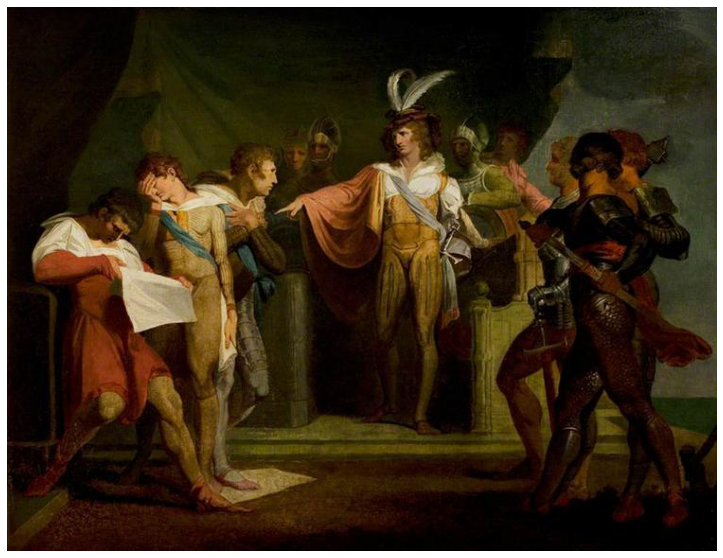

In [9]:
# view the image
show_artwork(load_artwork("".join(["full_image_", demo_image_tag, ".jpg"])))

The image is then transformed into a square with the correct proportions to be cut into tiles.

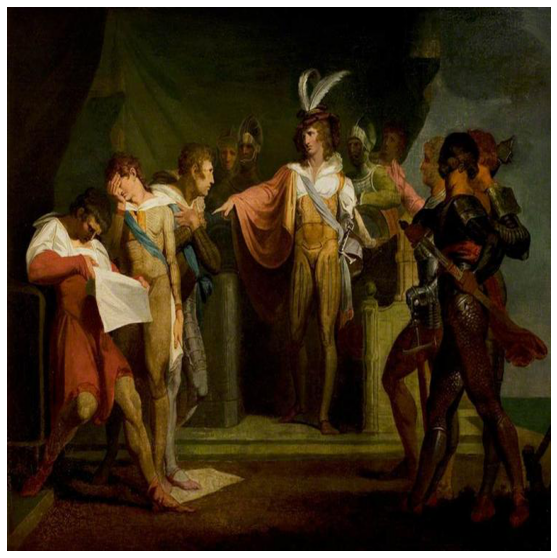

In [10]:
# process the image - (squaring)
squared_artwork = reshape_artwork(load_artwork("".join(["full_image_", demo_image_tag, ".jpg"])), NO_OF_TILES, PIXELS_PER_ROW)

# view the image
show_artwork(squared_artwork)

In [11]:
# create directory to hold the output tile images
create_image_tile_directory(demo_image_tag)

The image can now be sliced.

In [12]:
# process the image - (tiling)
squared_artwork_path_and_filename = "".join(["./data/tiles/",demo_image_tag,"/",demo_image_tag,".jpg"])

# save the tiles to the newly created directory
squared_artwork.save(squared_artwork_path_and_filename)

Here we can see the full set of tiles generated from a single image.

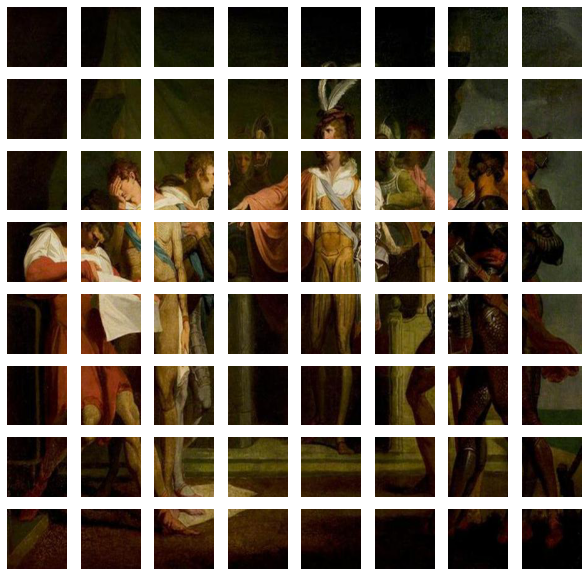

In [13]:
# view the image
tile_artwork(squared_artwork_path_and_filename, NO_OF_TILES, True, True)

With the demo complete. The demo image tiles are removed ready for processing all of the images.

In [14]:
# delete the directory and image tiles created in the demo
try:
    shutil.rmtree("".join(["./data/tiles/", demo_image_tag]))
except OSError:
    # error handling code would be placed here if developed into an end-user system
    pass

## Process the image files into Tiles
The _image_tags_ are read from the database and then the processing of all images to image tiles begins.

In [15]:
# Create a DB connection between python and the file system
conn = sqlite3.connect(''.join([data_file_path,"/database/artist.db"]))

In [16]:
# Simple SELECT (1 table)
image_data = pd.read_sql_query("""SELECT IMAGE_TAG
                                  FROM   ARTWORK_IMAGE;""", conn)

All image files are processed. As the process runs, a "Processed" file indicator is updated on the completion of the tiling of each image. This can be seen below the cell. The image tiles of each artwork image are saved within a dedicated directory for that artwork image.

In [17]:
# difine counter for number of images processed
counter = 0

for image_tag in image_data["image_tag"]:
    
    # process the image - (squaring)
    squared_artwork = reshape_artwork(load_artwork("".join(["full_image_", image_tag, ".jpg"])), NO_OF_TILES, PIXELS_PER_ROW)
    
    # create directory to hold the output tile images
    create_image_tile_directory(image_tag)
    
    # process the image - (tiling)
    squared_artwork_path_and_filename = "".join(["./data/tiles/",image_tag,"/",image_tag,".jpg"])
    
    # save the tiles to the newly created directory
    squared_artwork.save(squared_artwork_path_and_filename)
    
    # tile the image
    squared_artwork_path_and_filename = "".join(["./data/tiles/",image_tag,"/",image_tag,".jpg"])
    tile_artwork(squared_artwork_path_and_filename, NO_OF_TILES, True, False)
    
    # increment counter
    counter += 1
    
    # output progress
    sys.stdout.write(f"\rProcessed: {str(counter).zfill(4)}")

# notify that the task is complete
print("\nFinished")

Processed: 3306
Finished
